In [1]:
# standard cv libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# convolution operation
import scipy.signal as conv

In [2]:
im = cv2.imread("sonnet.png",0)

# Otsu's Algorithm

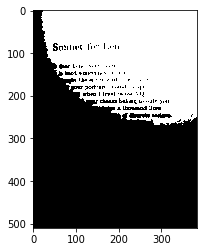

In [3]:
# build histogram
no_bins = 256
bins = np.arange(0,no_bins+1)
hist, bin_edges = np.histogram(im, bins=bins, density=True)

# w1
w1 = np.zeros(shape=no_bins)
for i in range(no_bins):
    w1[i] = np.sum(hist[0:i+1])
        
# mu1
mu1 = np.zeros(shape=no_bins)
for i in range(no_bins):
    if(w1[i] == 0):
        continue
    mu1[i] = np.sum(np.multiply(np.arange(1,i+2),hist[0:i+1]))/w1[i]

# w2 and mu2
w2 = np.zeros(shape=no_bins)
mu2 = np.zeros(shape=no_bins)
c = np.sum(np.multiply(np.arange(1,257), hist))
for i in range(no_bins):
    w2[i] = 1 - w1[i]
    if(w2[i] == 0):
        continue
    mu2[i] = (c - np.sum(np.multiply(np.arange(1,i+2),hist[0:i+1])))/w2[i]
    
# between class variance
var_b = w1*w2*(mu1-mu2)**2

# argmax t
t = np.argmax(var_b)
t = (t-1)/(no_bins-1)*256

im_thresholded = np.copy(im)
im_thresholded[im < t] = 0
im_thresholded[im > t] = 1

plt.imshow(im_thresholded, cmap="gray")

# Adaptive Thresholding

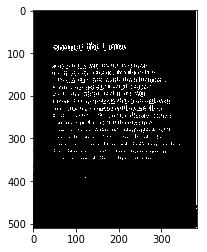

In [4]:
sz = 5
mean_filter = np.ones((sz,sz),np.float32)/(sz*sz)

# convolution with mean filter
im_convolved = conv.convolve2d(im, mean_filter, mode='same')

# im - im_convolved
im_subtracted = im - im_convolved

# threshold
threshold = 0.03 * 255
im_subtracted = im_subtracted - threshold
im_subtracted[im_subtracted > 0] = 1
im_subtracted[im_subtracted < 0] = 0

plt.imshow(im_subtracted, cmap="gray")

# Superpixels

In [7]:
print(im.dtype)

uint8


In [11]:
im = cv2.imread("superpix.jpg",0)

sz = 50*50;
diff = 0.4*255; 

# initialize mask of pixel labels
mask = np.zeros(shape=np.shape(im), dtype=float)
superpixel_count = 1

# for every pixel
for x in range(np.shape(im)[0]):
    for y in range(np.shape(im)[1]):
                
        # has been assigned to a superpixel
        if(mask[x,y] != 0):
            continue
            # mask[x,y] = superpixel_count
        
        # locate superpixels
        for i in range(np.shape(im)[0]):
            for j in range(np.shape(im)[1]):
                
                # conditions are satisfied
                #   not yet assigned     # intensity difference                 # distance
                if((mask[i,j] == 0) and (np.abs(int(im[x,y]) - int(im[i,j])) < diff) and (((x-i)**2 + (y-j)**2) < sz)):
                    mask[i,j] = superpixel_count
                    
        superpixel_count = superpixel_count + 1

In [12]:
boundary_map = np.copy(mask)
for x in range(np.shape(mask)[0]-1):
    for y in range(np.shape(mask)[1]-1):
        if(mask[x,y] != mask[x,y+1]):
            boundary_map[x,y] = 0
        if(mask[x,y] != mask[x+1,y]):
            boundary_map[x,y] = 0
        if(mask[x,y] != mask[x+1,y+1]):
            boundary_map[x,y] = 0

1.0


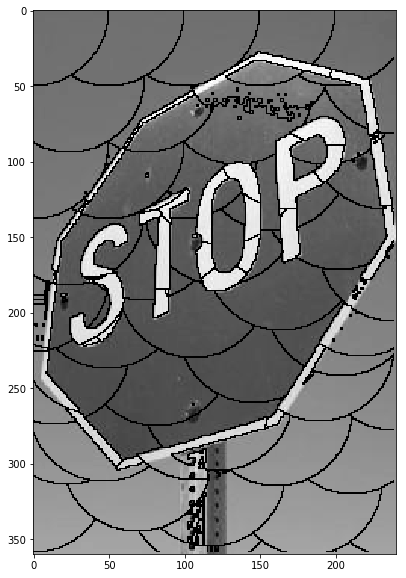

In [13]:

print(np.amin(mask))

test_im = np.copy(im)
test_im[boundary_map == 0] = 0
plt.figure(figsize=(10,10))
plt.imshow(test_im, cmap="gray")